In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!rm -rf sample_data
!rm -rf segmented
!rm -rf segmented_224
!rm -rf random.png random_data.png

In [3]:
# !unzip '/content/drive/MyDrive/Colab Notebooks/Final_Year_Project/combined_segmented.zip'
# !unzip '/content/drive/MyDrive/Colab Notebooks/Final_Year_Project/png.zip'
!unzip '/content/drive/MyDrive/Colab Notebooks/Final_Year_Project/bw_segmented.zip'

Streaming output truncated to the last 5000 lines.
 extracting: bw_segmented/49/4342.png  
 extracting: bw_segmented/49/4343.png  
 extracting: bw_segmented/49/4344.png  
 extracting: bw_segmented/49/4345.png  
 extracting: bw_segmented/49/4346.png  
 extracting: bw_segmented/49/4347.png  
 extracting: bw_segmented/49/4348.png  
 extracting: bw_segmented/49/4349.png  
 extracting: bw_segmented/49/435.png  
 extracting: bw_segmented/49/4350.png  
 extracting: bw_segmented/49/4351.png  
 extracting: bw_segmented/49/4352.png  
 extracting: bw_segmented/49/4353.png  
 extracting: bw_segmented/49/4354.png  
 extracting: bw_segmented/49/4355.png  
 extracting: bw_segmented/49/4356.png  
 extracting: bw_segmented/49/4357.png  
 extracting: bw_segmented/49/4358.png  
 extracting: bw_segmented/49/4359.png  
 extracting: bw_segmented/49/436.png  
 extracting: bw_segmented/49/4360.png  
 extracting: bw_segmented/49/4361.png  
 extracting: bw_segmented/49/4362.png  
 extracting: bw_segmented/49/43

In [4]:
import os

root_dir = os.listdir()
# os.rename('combined_segmented', 'segmented')
# os.rename('png', 'segmented')
os.rename('bw_segmented', 'segmented')

In [5]:
# Loading the data and generating labels
import numpy as np
import os
from imageio import imread
from keras.applications.resnet_v2 import preprocess_input
from keras.utils import to_categorical 
from skimage.transform import resize
import glob
import cv2
import random

IMG_SIZE = 32
no_of_classes = 55
image_height, image_width = IMG_SIZE, IMG_SIZE
no_of_color_channels = 3
root_dir = os.getcwd()
print(root_dir)

total_no_of_images = len(list(glob.glob(root_dir+"/segmented/[0-9]*/"+"/*.png", recursive=True)))
print(total_no_of_images)

count = 0
train_size = total_no_of_images - no_of_classes*3
data = np.empty((train_size, image_height, image_width, no_of_color_channels))
labels = np.empty(train_size, dtype=int)

test_count = 0
test_data = np.empty((no_of_classes*3, image_height, image_width, no_of_color_channels))
test_labels = np.empty(no_of_classes*3, dtype=int)

print(train_size)
print(no_of_classes*3)

r = random.randrange(total_no_of_images)
for i in range(no_of_classes):
    class_dir = root_dir + "/" + "segmented" + "/" + str(i)
    class_images = glob.glob(class_dir+'/*.png')
    size = len(class_images)
    if (i % 10 == 0): print(i)
    else: print(i, end=' ')
    for j in range(size):
        image_path = class_images[j]
        image =imread(image_path)
        # if len(image.shape) > 2 and image.shape[2] == 4:
        #     image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
        # image = resize(image, output_shape=(IMG_SIZE, IMG_SIZE))
        if count == r:
          cv2.imwrite(root_dir+'/random.png',image)
        image = preprocess_input(image)
        # image = resize(image, output_shape=(IMG_SIZE, IMG_SIZE))
        if j < size-3: 
          data[count] = image
        else:
          test_data[test_count] = image
        if count == r:
          cv2.imwrite(root_dir+'/random_data.png',image)
        if j < size-3:
          labels[count] = i
          count+=1
        else:
          test_labels[test_count] = i
          test_count+=1
print('')

/content
58482
58317
165
0
1 2 3 4 5 6 7 8 9 10
11 12 13 14 15 16 17 18 19 20
21 22 23 24 25 26 27 28 29 30
31 32 33 34 35 36 37 38 39 40
41 42 43 44 45 46 47 48 49 50
51 52 53 54 


In [6]:
# np.save(root_dir+'/data.npy', data)
# np.save(root_dir+'/labels.npy', labels)
# np.save(root_dir+'/test_data.npy', test_data)
# np.save(root_dir+'/test_labels.npy', test_labels)
# # data = np.load(root_dir+'/data.npy')
# # labels = np.load(root_dir+'/labels.npy')

(32, 32, 3)
-1.0
1.0
[ 0  0  0 ... 54 54 54]
165 (32, 32, 3)
[ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15
 16 16 16 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23
 24 24 24 25 25 25 26 26 26 27 27 27 28 28 28 29 29 29 30 30 30 31 31 31
 32 32 32 33 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38 38 38 39 39 39
 40 40 40 41 41 41 42 42 42 43 43 43 44 44 44 45 45 45 46 46 46 47 47 47
 48 48 48 49 49 49 50 50 50 51 51 51 52 52 52 53 53 53 54 54 54]


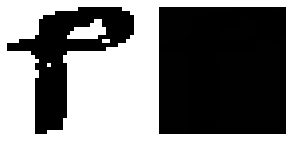

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

print(data[random.randrange(total_no_of_images)].shape)
fig = plt.figure(figsize=(5, 5))
fig.add_subplot(1, 2, 1)
plt.imshow(cv2.imread(root_dir+'/random.png'))
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(cv2.imread(root_dir+'/random_data.png'))
plt.axis('off')
print(data.min())
print(data.max())
print(labels)
print(len(test_data), test_data[random.randrange(no_of_classes)].shape)
print(test_labels)

In [40]:
# Importing ResNet
from keras.applications.resnet_v2 import ResNet152V2

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = ResNet152V2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False
# base_model.summary()

In [41]:
# # Modifying the model
from keras import Model
from keras.layers import Dense, Flatten, Dropout
from keras import layers, models


# character_output = Dense(no_of_classes, activation='softmax')
# character_output = character_output(base_model.layers[-2].output)
# character_input = base_model.input
# character_model = Model(inputs=character_input, outputs=character_output)
# for layer in character_model.layers[:-1]:
#   layer.trainable = False


flatten_layer = Flatten()
dense_layer_1 = Dense(256, activation='relu')
dropout_layer_1 = Dropout(0.4)
dense_layer_2 = Dense(128, activation='relu')
dropout_layer_2 = Dropout(0.6)
prediction_layer = Dense(55, activation='softmax')

# character_model = models.Sequential([
#     base_model,
#     flatten_layer,
#     dense_layer_1,
#     dense_layer_2,
#     prediction_layer
# ])
# character_model.summary()

# flatten_layer = layers.Flatten()
# dense_layer_1 = layers.Dense(64, activation='relu')
# prediction_layer = layers.Dense(55, activation='softmax')

character_model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    dropout_layer_2,
    dense_layer_2,
    prediction_layer
])
character_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 1, 1, 2048)        58331648  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_15 (Dense)            (None, 256)               524544    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 55)               

In [42]:
# Compiling the model
from keras.optimizers import Adam, SGD
custom_adam = Adam(learning_rate=0.0001)
custom_sgd = SGD(learning_rate=0.1)
character_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=custom_sgd,
    metrics=['accuracy']
)

In [43]:
# EarlyStopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [44]:
# Training the model
history = character_model.fit(
    x=data,
    y=labels,
    epochs=200,
    verbose='auto',
    validation_split=0.1,
    shuffle=True, 
    callbacks=[es],
    batch_size=64
)

Epoch 1/200
821/821 [==============================] - 44s 42ms/step - loss: 1.6642 - accuracy: 0.5661 - val_loss: 3.7398 - val_accuracy: 0.6485
Epoch 2/200
821/821 [==============================] - 31s 38ms/step - loss: 1.1106 - accuracy: 0.6949 - val_loss: 4.0131 - val_accuracy: 0.6499
Epoch 3/200
821/821 [==============================] - 31s 38ms/step - loss: 0.9741 - accuracy: 0.7286 - val_loss: 4.1641 - val_accuracy: 0.6591
Epoch 4/200
821/821 [==============================] - 31s 38ms/step - loss: 0.9143 - accuracy: 0.7446 - val_loss: 4.4181 - val_accuracy: 0.6590
Epoch 5/200
821/821 [==============================] - 31s 38ms/step - loss: 0.8637 - accuracy: 0.7576 - val_loss: 4.7608 - val_accuracy: 0.6631
Epoch 6/200
821/821 [==============================] - 33s 41ms/step - loss: 0.8260 - accuracy: 0.7669 - val_loss: 4.7361 - val_accuracy: 0.6668
Epoch 7/200
821/821 [==============================] - 34s 41ms/step - loss: 0.7983 - accuracy: 0.7736 - val_loss: 4.4072 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


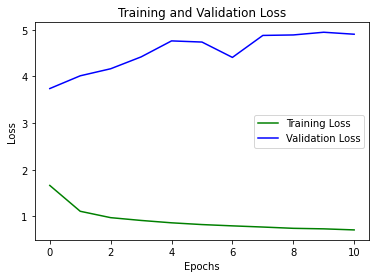

In [46]:
print(history.history.keys())
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(11)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


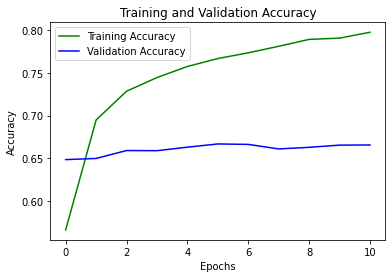

In [47]:
print(history.history.keys())
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(11)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
character_model.save('character_model_resnet_152_v2.h5')

In [18]:
predictions = character_model.predict(test_data)
print('Shape: {}'.format(predictions.shape))

6/6 [==============================] - 4s 45ms/step
Shape: (165, 55)


In [19]:
for i in range(no_of_classes):
  output_neuron = np.argmax(predictions[i])
  print('Most active neuron: {} ({:.2f}%)'.format(
      output_neuron,
      100 * predictions[i][output_neuron]
  ))

Most active neuron: 0 (49.45%)
Most active neuron: 0 (99.68%)
Most active neuron: 15 (70.27%)
Most active neuron: 1 (99.75%)
Most active neuron: 1 (99.20%)
Most active neuron: 1 (86.04%)
Most active neuron: 2 (59.32%)
Most active neuron: 2 (79.12%)
Most active neuron: 2 (65.73%)
Most active neuron: 30 (54.19%)
Most active neuron: 3 (97.13%)
Most active neuron: 3 (95.09%)
Most active neuron: 4 (40.33%)
Most active neuron: 4 (22.88%)
Most active neuron: 17 (30.16%)
Most active neuron: 5 (33.75%)
Most active neuron: 5 (63.57%)
Most active neuron: 6 (24.34%)
Most active neuron: 1 (24.39%)
Most active neuron: 5 (22.93%)
Most active neuron: 6 (48.14%)
Most active neuron: 7 (65.80%)
Most active neuron: 7 (70.60%)
Most active neuron: 7 (98.67%)
Most active neuron: 11 (98.25%)
Most active neuron: 9 (14.99%)
Most active neuron: 3 (27.96%)
Most active neuron: 9 (29.33%)
Most active neuron: 8 (24.98%)
Most active neuron: 9 (32.78%)
Most active neuron: 10 (72.80%)
Most active neuron: 13 (74.19%)
Mo

In [20]:
top1_correct = 0
top1_incorrect = 0
top5_correct = 0
top5_incorrect = 0
for i in range(no_of_classes*3):
  s = set()
  sorted_predictions = np.sort(predictions[i])[::-1]
  for j in range(5):
    x = list(np.where(predictions[i]==sorted_predictions[j]))[0][0]
    s.add(x)
  # print(list(s))
  if test_labels[i] in s: top5_correct+=1
  else: top5_incorrect+=1
  if test_labels[i] == np.argmax(predictions[i]): top1_correct+=1
  else: top1_incorrect+=1

print('Top-1 Accuracy: ', (top1_correct*100)/(top1_correct+top1_incorrect))
print('Top-5 Accuracy: ', (top5_correct*100)/(top5_correct+top5_incorrect))

Top-1 Accuracy:  64.24242424242425
Top-5 Accuracy:  77.57575757575758
